<a href="https://colab.research.google.com/github/rgs8890/OESON-Data-Science-Internship/blob/main/Project%204/OESONFinal_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OESON Final Project BANK Data


We have data corresponding to a Bank Loan Dataset. This project consists of:
- Data Cleaning/ Pre-processing
- EDA (Data Analysis)
- TensorFlow NN Model (Fully-Connected Conv1D Layers)
- TensorFlow LSTM Model
- Best Model Comparision + Optimisation
- Evaluations and Predictions
- Saving the Models


In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Now we have set up the environment, we can download the data
train_data = pd.read_csv(r"/content/drive/MyDrive/OESON Projects/Loan_data/train_v2.csv/train_v2.csv")
test_data = pd.read_csv(r"/content/drive/MyDrive/OESON Projects/Loan_data/test_v2.csv/test_v2.csv")

<ipython-input-5-d9937eba4101>:2: DtypeWarning: Columns (135,204,274,417) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(r"/content/drive/MyDrive/OESON Projects/Loan_data/train_v2.csv/train_v2.csv")
<ipython-input-5-d9937eba4101>:3: DtypeWarning: Columns (417) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(r"/content/drive/MyDrive/OESON Projects/Loan_data/test_v2.csv/test_v2.csv")


In [ ]:
test_data

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778
0,105472,147,6,0.487058,1100,17.0,75506,964.0,12686.0,152.63,...,-8.71,19,3.30,-9.37,0.50,0.0539,-1.0733,0,1,1079
1,105473,156,6,0.728518,5400,3.0,79754,1455.0,4803.0,153.95,...,-13.26,24,9.53,-7.55,6.22,0.3030,0.6087,0,1,36
2,105474,132,9,0.898133,2200,16.0,113,5735.0,2387.0,130.61,...,-4.99,9,3.25,-2.33,1.69,0.2317,0.4184,0,0,393
3,105475,128,7,0.038411,1300,4.0,3793,4689.0,3469.0,120.50,...,-16.83,11,0.26,-5.31,0.78,0.2826,-0.7711,0,0,394
4,105476,119,10,0.443620,1300,16.0,13026,2788.0,7438.0,127.00,...,-20.00,10,13.55,-0.61,0.01,0.1815,-1.0843,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210939,316411,140,9,0.802220,3600,10.0,9836,831.0,491.0,128.28,...,-12.54,3,6.22,-4.55,7.01,0.2130,-0.7890,0,1,13
210940,316412,154,9,0.477440,3600,3.0,80502,4283.0,280.0,154.13,...,-9.64,20,5.98,-4.13,3.02,0.2582,0.4792,1,1,41
210941,316413,150,8,0.480407,4400,7.0,14507,78.0,1502.0,150.75,...,-1.12,4,0.41,-0.16,0.08,0.1552,0.8375,1,1,20
210942,316414,135,8,0.223248,2700,16.0,13700,9572.0,5151.0,131.42,...,-29.81,51,20.39,-15.14,11.75,0.2411,0.7004,0,0,513


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 771 entries, id to loss
dtypes: float64(653), int64(99), object(19)
memory usage: 620.4+ MB


## Feature Creation

In [ ]:
def fraud(x):
  if x == 0:
    return 0
  else:
    return 1

train_data["fraud"] = train_data["loss"].apply(fraud)

In [ ]:
train_data = train_data.drop(columns = {"fraud"})

In [ ]:
train_data.fraud.value_counts()

AttributeError: ignored

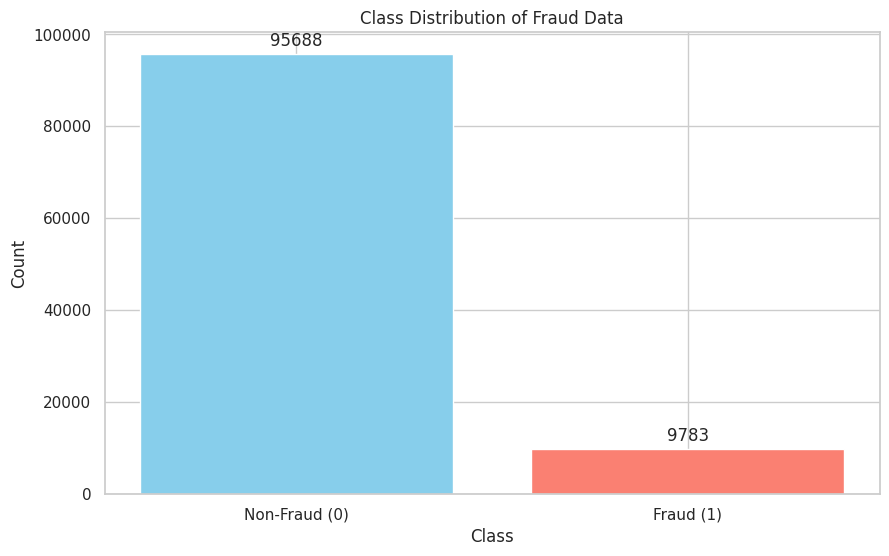

In [ ]:
# Assuming you have a pandas DataFrame called train_data
fraud_counts = train_data['fraud'].value_counts()

# Define custom colors for the bars
colors = ['skyblue', 'salmon']

# Plot the class distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(fraud_counts.index, fraud_counts.values, color=colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(fraud_counts.index, ['Non-Fraud (0)', 'Fraud (1)'])
plt.title('Class Distribution of Fraud Data')

# Add labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom', fontsize=12)

plt.show()

## Data Cleaning

In [ ]:
def data_cleaning(df):
    null = df.isnull().sum()
    duplicate = df.duplicated().sum()
    percentage_null = 100*(null/len(df))
    data_type = df.dtypes
    unique = df.nunique()
    return pd.DataFrame({"Duplicated Values": duplicate,
                         "Null Values": null,
                         "Percentage of Null Values": percentage_null,
                         "Unique Values": unique,
                         "Data Type": data_type})

In [ ]:
data_cleaning(train_data)

,Duplicated Values,Null Values,Percentage of Null Values,Unique Values,Data Type
id,0,0,0.000000,105471,int64
f1,0,0,0.000000,74,int64
f2,0,0,0.000000,10,int64
f3,0,0,0.000000,105209,float64
f4,0,0,0.000000,61,int64
...,...,...,...,...,...
f775,0,1525,1.445895,23740,float64
f776,0,0,0.000000,2,int64
f777,0,0,0.000000,2,int64
f778,0,0,0.000000,64,int64


In [ ]:
data_train_columns = train_data.drop(columns = {"id", "loss"})

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 771 entries, id to loss
dtypes: float64(653), int64(99), object(19)
memory usage: 620.4+ MB


In [ ]:
data_train_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 769 entries, f1 to f778
dtypes: float64(653), int64(97), object(19)
memory usage: 618.8+ MB


In [ ]:
def preprocess_and_concatenate(original_df):
    # Extract object columns
    object_columns_df = original_df.select_dtypes(include='object')

    # Replace 'NA' with NaN and convert to float64
    for column in object_columns_df.columns:
        object_columns_df[column] = object_columns_df[column].replace('NA', np.nan).astype('float64')

    # Reset index of object_columns_df for proper alignment
    object_columns_df.reset_index(drop=True, inplace=True)

    # Concatenate object columns back to the original DataFrame
    combined_df = pd.concat([original_df, object_columns_df], axis=1)

    # Remove object columns
    combined_df = combined_df.select_dtypes(exclude=['object'])

    return combined_df

In [ ]:
train_df = preprocess_and_concatenate(train_data)
test_df = preprocess_and_concatenate(test_data)

In [ ]:
correlation_with_loss = train_df.corrwith(train_df['loss'])

# Find positions of NaN values
nan_positions = np.where(np.isnan(correlation_with_loss))

# Print the positions of NaN values
print("Positions of NaN values:", nan_positions)

correlation_with_loss

Positions of NaN values: (array([ 31,  32,  33,  35,  36, 652, 672, 673, 674, 708, 736]),)


id      0.000342
f1     -0.008231
f2     -0.000588
f3      0.000785
f4     -0.005019
          ...   
f537   -0.001857
f626   -0.001061
f627   -0.000711
f695   -0.001778
f698   -0.001875
Length: 771, dtype: float64

We will continue by removing these columns for the loss function which is the final column on this dataframe.

In [ ]:
corr_train_df = train_df.drop(columns=train_df.columns[nan_positions])

corr_test_df = test_df.drop(columns=test_df.columns[nan_positions])

In [ ]:
corr_test_df

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f419,f420,f469,f472,f534,f537,f626,f627,f695,f698
0,105472,147,6,0.487058,1100,17.0,75506,964.0,12686.0,152.63,...,2.350000e+12,6.010000e+15,1.040370e+25,7.092106e+32,3.776692e+20,3.072658e+30,1.195219e+29,3.299727e+37,2.182403e+20,8.460000e+18
1,105473,156,6,0.728518,5400,3.0,79754,1455.0,4803.0,153.95,...,2.400000e+14,6.300000e+18,2.251247e+21,3.187055e+27,7.919729e+23,5.551988e+30,1.308737e+31,1.155302e+41,1.524637e+21,1.300379e+21
2,105474,132,9,0.898133,2200,16.0,113,5735.0,2387.0,130.61,...,4.057069e+10,9.890000e+13,1.033346e+23,3.724300e+29,2.913588e+22,8.805498e+28,1.957785e+29,6.600806e+38,6.227882e+19,5.439841e+19
3,105475,128,7,0.038411,1300,4.0,3793,4689.0,3469.0,120.50,...,2.200000e+13,1.030000e+16,6.999767e+22,8.160895e+21,7.635501e+18,6.780683e+24,7.879977e+30,3.893515e+40,9.858548e+20,1.389538e+19
4,105476,119,10,0.443620,1300,16.0,13026,2788.0,7438.0,127.00,...,8.560045e+08,0.000000e+00,1.335618e+25,2.707987e+31,3.080000e+17,1.236445e+22,7.207280e+30,5.355811e+37,1.177307e+20,1.590917e+20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210939,316411,140,9,0.802220,3600,10.0,9836,831.0,491.0,128.28,...,1.800000e+13,1.520000e+18,1.441321e+21,2.350000e+18,2.002331e+22,4.664105e+26,9.022604e+30,8.127590e+40,9.230479e+19,3.957668e+20
210940,316412,154,9,0.477440,3600,3.0,80502,4283.0,280.0,154.13,...,3.000000e+12,1.910000e+16,9.077140e+22,3.423711e+29,1.970000e+17,2.177307e+22,2.576980e+30,1.388469e+40,4.909665e+20,4.553207e+20
210941,316413,150,8,0.480407,4400,7.0,14507,78.0,1502.0,150.75,...,4.201897e+08,3.150000e+11,7.230000e+14,2.313462e+19,1.870601e+20,1.143809e+26,5.448614e+29,3.285768e+39,9.628980e+19,8.010309e+19
210942,316414,135,8,0.223248,2700,16.0,13700,9572.0,5151.0,131.42,...,8.100000e+14,2.621336e+19,3.026695e+24,2.927440e+31,1.300773e+22,2.246545e+28,1.440217e+30,4.682227e+39,4.574461e+20,3.703197e+20


In [ ]:
test_data

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778
0,105472,147,6,0.487058,1100,17.0,75506,964.0,12686.0,152.63,...,-8.71,19,3.30,-9.37,0.50,0.0539,-1.0733,0,1,1079
1,105473,156,6,0.728518,5400,3.0,79754,1455.0,4803.0,153.95,...,-13.26,24,9.53,-7.55,6.22,0.3030,0.6087,0,1,36
2,105474,132,9,0.898133,2200,16.0,113,5735.0,2387.0,130.61,...,-4.99,9,3.25,-2.33,1.69,0.2317,0.4184,0,0,393
3,105475,128,7,0.038411,1300,4.0,3793,4689.0,3469.0,120.50,...,-16.83,11,0.26,-5.31,0.78,0.2826,-0.7711,0,0,394
4,105476,119,10,0.443620,1300,16.0,13026,2788.0,7438.0,127.00,...,-20.00,10,13.55,-0.61,0.01,0.1815,-1.0843,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210939,316411,140,9,0.802220,3600,10.0,9836,831.0,491.0,128.28,...,-12.54,3,6.22,-4.55,7.01,0.2130,-0.7890,0,1,13
210940,316412,154,9,0.477440,3600,3.0,80502,4283.0,280.0,154.13,...,-9.64,20,5.98,-4.13,3.02,0.2582,0.4792,1,1,41
210941,316413,150,8,0.480407,4400,7.0,14507,78.0,1502.0,150.75,...,-1.12,4,0.41,-0.16,0.08,0.1552,0.8375,1,1,20
210942,316414,135,8,0.223248,2700,16.0,13700,9572.0,5151.0,131.42,...,-29.81,51,20.39,-15.14,11.75,0.2411,0.7004,0,0,513


In [ ]:
def create_data_subsets(train_data, test_data, num_train_samples = 6000, num_validation_samples = 2000, num_test_samples = 2000):
    train_df_subset = train_data.sample(n=num_train_samples, random_state=42)
    validation_df_subset = train_data.sample(n=num_validation_samples, random_state=43)
    test_df_subset = train_data.sample(n=num_test_samples, random_state = 44)
    test_df_prediction = test_data.sample(n=num_test_samples, random_state=45)
    return train_df_subset, validation_df_subset, test_df_subset, test_df_prediction

In [ ]:
train_df_custom_subset, validation_df_custom_subset, test_df_custom_subset, test_df_custom_prediction = create_data_subsets(
   corr_train_df, corr_test_df)

In [ ]:
test_df_custom_prediction

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f419,f420,f469,f472,f534,f537,f626,f627,f695,f698
43541,149013,131,4,0.162228,2100,3.0,78224,2605.0,410.0,114.38,...,5.650000e+12,0.000000e+00,7.499045e+20,2.878883e+31,6.804020e+20,8.795610e+21,2.094518e+30,5.019737e+39,1.002198e+20,6.310000e+18
126176,231648,122,9,0.855244,1100,16.0,84938,1332.0,7520.0,123.26,...,1.978163e+19,1.156069e+25,2.343055e+19,7.813738e+24,1.275454e+23,4.058727e+29,7.211353e+29,1.294493e+39,4.110103e+20,3.683308e+20
42319,147791,125,10,0.659530,2400,4.0,85793,27.0,4131.0,153.19,...,1.040000e+13,0.000000e+00,1.828403e+21,6.916444e+23,2.091286e+23,1.807012e+29,8.138642e+30,4.860447e+37,3.719492e+19,2.730221e+19
124821,230293,127,8,0.332667,2300,7.0,76831,3063.0,2839.0,119.35,...,1.880000e+12,0.000000e+00,3.800524e+22,1.507582e+28,7.452230e+19,4.793164e+30,4.368437e+29,2.033949e+41,4.680000e+18,3.391304e+20
148163,253635,157,9,0.242313,4500,7.0,10590,5517.0,3937.0,152.31,...,1.798473e+07,4.711999e+09,6.650770e+23,4.245870e+30,1.373757e+23,5.926092e+29,2.564720e+30,2.025006e+40,3.535208e+20,3.179003e+20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106358,211830,119,10,0.475798,2700,NaN,87349,3281.0,324.0,118.02,...,0.000000e+00,0.000000e+00,7.277015e+21,1.144520e+28,1.270000e+17,1.126698e+22,3.017113e+27,2.898231e+36,3.450000e+18,2.940000e+18
150811,256283,128,6,0.522298,2000,4.0,1131,8073.0,8013.0,126.61,...,5.970000e+14,2.407250e+19,1.233316e+24,8.516801e+30,1.851304e+24,1.486860e+31,9.714277e+29,3.376214e+39,2.898988e+20,2.563060e+20
83099,188571,137,10,0.944720,2600,4.0,9290,2176.0,1429.0,134.02,...,8.560000e+12,6.620000e+16,6.638894e+22,3.431340e+29,4.526329e+20,4.045721e+26,2.564650e+29,6.234394e+38,1.116786e+20,8.833569e+19
136723,242195,158,10,0.748132,2200,3.0,76831,294.0,12150.0,162.54,...,1.181995e+08,0.000000e+00,8.581220e+21,5.373026e+29,1.356537e+21,1.454534e+30,8.182334e+28,7.365596e+38,1.846785e+20,7.705991e+18


In [ ]:
from sklearn.impute import KNNImputer

def apply_knn_imputer(train_df, validation_df, test_df, test_prediction_df, n_neighbors=5):
    imputer = KNNImputer(n_neighbors=n_neighbors)

    # Imputation
    train_df_imputed = pd.DataFrame(imputer.fit_transform(train_df_custom_subset), columns=train_df.columns)
    validation_df_imputed = pd.DataFrame(imputer.fit_transform(validation_df), columns=validation_df.columns)
    test_df_imputed = pd.DataFrame(imputer.fit_transform(test_df), columns=test_df.columns)
    test_df_prediction_imputed = pd.DataFrame(imputer.fit_transform(test_prediction_df), columns= test_prediction_df.columns)

    return train_df_imputed, validation_df_imputed, test_df_imputed, test_df_prediction_imputed

In [ ]:
train_df_cleaned, validation_df_cleaned, test_df_cleaned, test_df_prediction_cleaned = apply_knn_imputer(
    train_df_custom_subset, validation_df_custom_subset, test_df_custom_subset, test_df_custom_prediction)

In [ ]:
data_cleaning(train_df_cleaned)

,Duplicated Values,Null Values,Percentage of Null Values,Unique Values,Data Type
id,0,0,0.0,6000,float64
f1,0,0,0.0,69,float64
f2,0,0,0.0,10,float64
f3,0,0,0.0,5997,float64
f4,0,0,0.0,58,float64
...,...,...,...,...,...
f537,0,0,0.0,5984,float64
f626,0,0,0.0,5978,float64
f627,0,0,0.0,5978,float64
f695,0,0,0.0,5794,float64


Further pre-processing steps involve: Checking for outliers for the data for all different columns, then preferablly applying a standard distribution to specific columns.

In [ ]:
train_df_cleaned

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f419,f420,f469,f472,f534,f537,f626,f627,f695,f698
0,43441.0,134.0,9.0,0.498281,2200.0,16.0,79202.0,4444.0,6210.0,130.77,...,9.020000e+11,5.920000e+15,2.671053e+22,6.683896e+28,2.505984e+23,1.145045e+30,1.885290e+29,5.992508e+38,5.952505e+19,4.771959e+19
1,8943.0,138.0,9.0,0.471713,1100.0,4.0,13699.0,574.0,5061.0,132.36,...,5.630000e+11,2.870000e+15,3.637193e+19,1.747811e+25,2.649094e+23,1.329518e+30,1.969171e+28,2.914414e+37,1.358357e+19,1.155518e+19
2,75386.0,163.0,8.0,0.037343,3700.0,4.0,13380.0,2752.0,2385.0,160.88,...,1.230000e+12,6.040000e+15,5.892633e+22,2.255519e+29,1.031584e+23,4.327903e+29,2.816243e+30,1.961827e+40,4.321916e+20,3.877061e+20
3,20218.0,124.0,9.0,0.881915,1500.0,7.0,75464.0,2078.0,113.0,128.15,...,2.010000e+14,4.410000e+18,4.950855e+20,3.752047e+26,7.150000e+14,1.696329e+19,3.001076e+29,6.569374e+38,1.410910e+20,1.219581e+20
4,66764.0,140.0,9.0,0.266526,4400.0,4.0,75545.0,2630.0,9.0,140.50,...,8.772621e+06,1.254485e+09,1.438485e+21,1.514123e+27,3.210000e+11,1.290000e+15,1.404663e+29,5.822690e+38,3.604601e+19,2.921356e+19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,59246.0,141.0,8.0,0.168616,4600.0,7.0,82432.0,37.0,3530.0,144.46,...,2.610000e+12,2.220000e+16,2.840000e+13,3.080000e+17,9.765047e+22,3.722660e+29,2.538789e+30,1.739391e+40,3.994642e+20,3.536176e+20
5996,23312.0,121.0,7.0,0.323604,1800.0,16.0,80455.0,7357.0,4515.0,124.25,...,1.900000e+12,1.620000e+16,2.077690e+24,1.703732e+31,1.290754e+24,1.227344e+31,3.616676e+28,8.073880e+37,1.676556e+19,1.548271e+19
5997,17984.0,127.0,4.0,0.371946,1800.0,4.0,78935.0,2752.0,3178.0,124.63,...,4.370000e+14,1.495049e+19,4.080440e+21,6.070696e+27,2.415700e+22,5.836433e+28,4.942456e+29,1.530813e+39,1.679998e+20,1.321110e+20
5998,73932.0,140.0,9.0,0.285354,3700.0,3.0,75880.0,72.0,916.0,143.38,...,0.000000e+00,0.000000e+00,5.180000e+13,7.230000e+17,1.764065e+19,5.777010e+24,7.384285e+28,2.235016e+38,2.488289e+19,2.245925e+19


In [ ]:
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler


skewness_results = train_df_cleaned.apply(skew)
skewness_results

columns_to_standardize = skewness_results[(skewness_results > 0.5) | (skewness_results < -0.5)].index
columns_to_standardize

scaler = StandardScaler()

for column in columns_to_standardize:
    train_df_cleaned[column] = scaler.fit_transform(train_df_cleaned[column].values.reshape(-1, 1))

In [ ]:
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler

def standardize_skewed_columns(input_df):
    skewness_results = input_df.apply(skew)
    columns_to_standardize = skewness_results[(skewness_results > 0.5) | (skewness_results < -0.5)].index

    scaler = StandardScaler()

    standardize_df = input_df.copy()  # Create a copy to avoid modifying the original DataFrame

    for column in columns_to_standardize:
        standardize_df[column] = scaler.fit_transform(standardize_df[column].values.reshape(-1, 1))

    return standardize_df

Based on this, we can see there are a significant number of columns which are above the skewness threshold. We will apply normal distribution to these columns to standardise them.

In [ ]:
standardize_train_df = standardize_skewed_columns(train_df_cleaned)
standardize_validation_df = standardize_skewed_columns(validation_df_cleaned)
standardize_test_df = standardize_skewed_columns(test_df_cleaned)
standardize_test_prediction_df = standardize_skewed_columns(test_df_prediction_cleaned)

In [ ]:
standardize_validation_df

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f419,f420,f469,f472,f534,f537,f626,f627,f695,f698
0,27102.0,-0.169711,0.446250,0.525688,-0.827798,0.525277,627.0,0.530786,1.660146,-0.454591,...,-0.055547,-0.035453,-0.040379,-0.069221,0.147187,-0.019140,-0.419053,-0.343575,-0.549318,-0.538760
1,105189.0,-0.570840,1.029583,0.106513,-0.827798,-0.646780,85916.0,-0.195136,-0.549598,-0.568677,...,-0.055546,-0.035453,-0.106658,-0.081347,-0.117793,-0.082070,-0.415456,-0.342949,-0.529917,-0.521472
2,5118.0,-0.437130,-0.137083,0.398778,-0.043932,-0.842123,7458.0,1.198287,-0.610358,-0.576521,...,-0.055542,-0.035453,-0.097906,-0.080611,-0.117781,-0.082070,-0.402676,-0.337887,-0.505064,-0.494069
3,40749.0,0.833111,-0.720417,0.097879,1.880102,-0.060752,78520.0,0.051575,-0.926036,1.054911,...,-0.055520,-0.035453,-0.106101,-0.081322,-0.117796,-0.082070,2.066470,2.152284,1.790737,1.743383
4,80640.0,-0.905114,-0.137083,0.261798,-1.112840,-0.646780,8417.0,-0.241320,-0.566958,-0.689894,...,-0.055544,-0.035453,-0.106676,-0.081347,-0.117773,-0.082069,-0.413173,-0.342404,-0.522145,-0.518390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,70971.0,1.501659,1.029583,0.978493,1.452539,-0.842123,9482.0,-1.165794,-1.058063,1.724454,...,-0.055544,-0.035453,-0.106710,-0.081348,-0.117796,-0.082070,0.416288,0.318257,0.444228,0.497879
1996,104928.0,-0.704549,-0.137083,0.183273,0.597413,-0.646780,79884.0,0.938550,-0.208337,-0.470278,...,-0.054994,-0.035439,-0.102450,-0.081028,-0.117756,-0.082069,0.120140,-0.026961,0.314842,0.252745
1997,62374.0,1.234240,-0.720417,0.109446,1.238758,-0.646780,81375.0,-1.082110,1.572432,1.380056,...,-0.055541,-0.035453,-0.106710,-0.081348,-0.113745,-0.081839,0.416991,0.313415,0.436940,0.446007
1998,17159.0,-0.102856,1.029583,0.536741,-0.827798,-0.646780,14024.0,0.087496,-0.918726,-0.080246,...,-0.055547,-0.035453,-0.106352,-0.081336,-0.117796,-0.082070,-0.417355,-0.343232,-0.541678,-0.531104


## EDA (Exploratory Data Analysis)

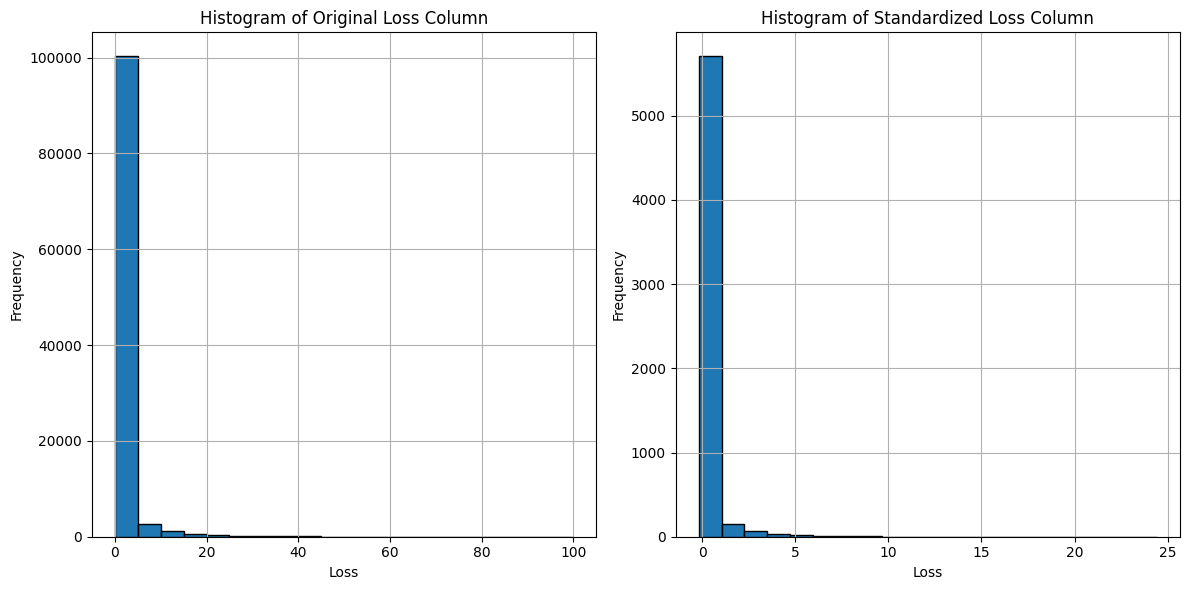

In [ ]:
# Select the 'loss' column
loss_column_original = train_data['loss']
loss_column_standardized = standardize_train_df['loss']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histogram of the original 'loss' column
axes[0].hist(loss_column_original, bins=20, edgecolor='black')
axes[0].set_title('Histogram of Original Loss Column')
axes[0].set_xlabel('Loss')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Plot the histogram of the standardized 'loss' column
axes[1].hist(loss_column_standardized, bins=20, edgecolor='black')
axes[1].set_title('Histogram of Standardized Loss Column')
axes[1].set_xlabel('Loss')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats

def diagnostic_plots(df, variable):
    # Define figure size and style
    plt.figure(figsize=(16, 6))
    sns.set(style="whitegrid")

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, kde=True, color='steelblue')
    plt.title('Histogram', fontsize=14)
    plt.xlabel(variable.capitalize(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Q-Q plot
    plt.subplot(1, 3, 2)
    scipy.stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title('Q-Q Plot', fontsize=14)
    plt.xlabel('Theoretical Quantiles', fontsize=12)
    plt.ylabel('Ordered Data Quantiles', fontsize=12)

    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable], color='lightgray')
    plt.title('Boxplot', fontsize=14)
    plt.ylabel(variable.capitalize(), fontsize=12)

    # Adjust layout and spacing
    plt.tight_layout()
    plt.show()

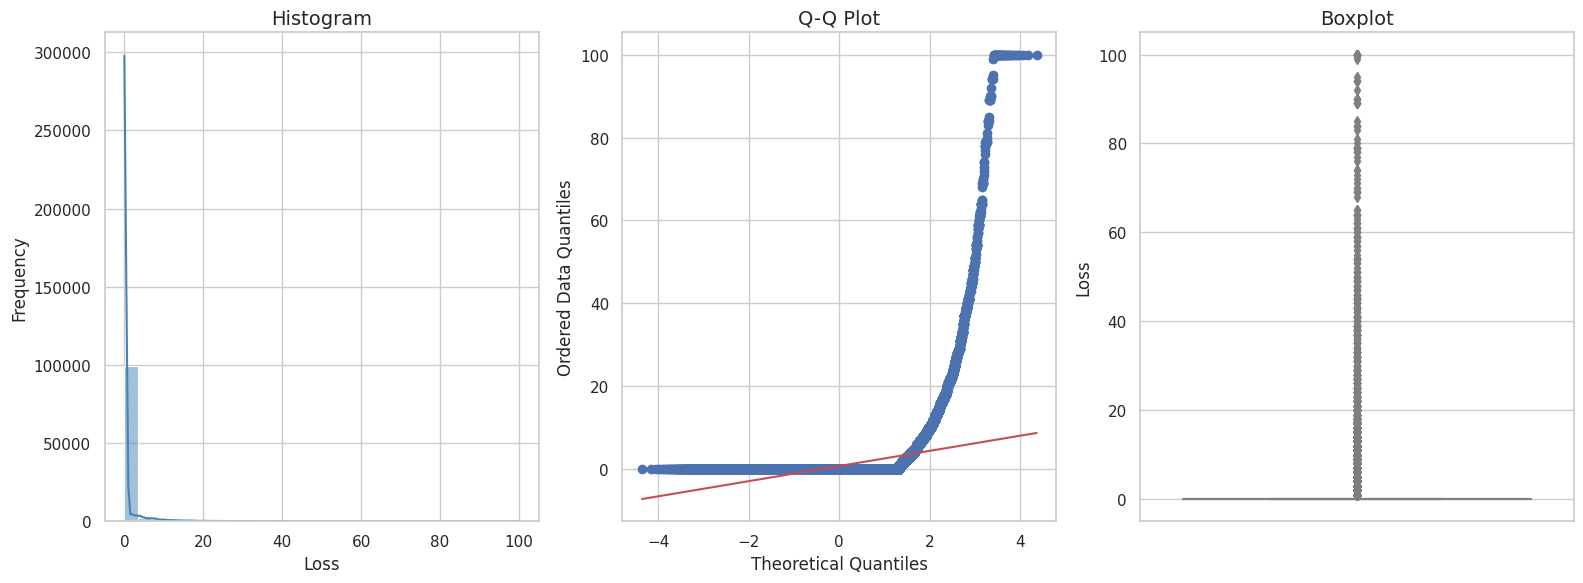

In [ ]:
diagnostic_plots(train_data, 'loss')

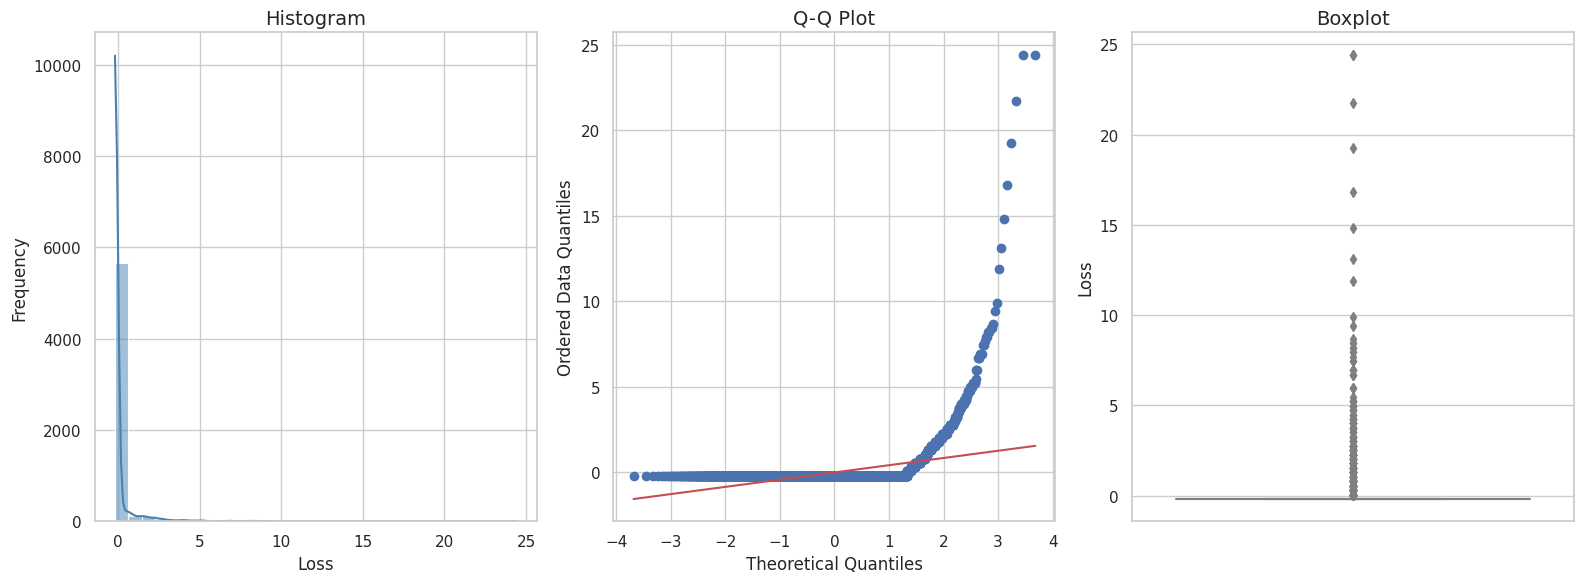

In [ ]:
diagnostic_plots(standardize_train_df, 'loss')

As we standardise the variables, we can see that the loss decreases via the histograms, and in Q-Q Plots, the observed quantiles align more with the theoretical cumulative distribution, suggesting that the tails are less heavier within the data compared to a theoretical distribution.

As you can see, every single variable here has a very small positive/ negative correlation to the data, so we do not remove any features. We only remove the features which have no correlation to the loss variable, to reduce noise of the data.

## Deep Learning Neural Networks

### Fully-Connected NN

In [ ]:
standardize_test_df

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f419,f420,f469,f472,f534,f537,f626,f627,f695,f698
0,51190.0,0.109427,-0.122111,0.044772,0.594623,0.543421,75932.0,-1.084579,0.001900,0.648230,...,-0.085191,-0.055173,-0.103321,-0.069460,-0.109777,-0.073925,0.251518,0.055656,0.534857,0.473174
1,98479.0,-0.891433,0.451180,0.469801,-1.156122,-0.644384,81224.0,-0.825379,-0.272242,-0.829937,...,-0.085084,-0.055171,-0.103320,-0.069460,-0.109826,-0.073927,-0.412007,-0.338166,-0.484320,-0.475731
2,12982.0,-0.624537,0.451180,0.814647,0.244474,-0.644384,76831.0,0.415328,-0.148479,-0.715683,...,-0.084489,-0.055150,-0.102804,-0.069440,-0.109890,-0.073928,-0.167204,-0.214712,-0.074749,-0.069509
3,79013.0,1.777528,-0.122111,0.804746,1.434981,-0.644384,85218.0,-1.028899,1.338010,1.504424,...,-0.085213,-0.055173,-0.103321,-0.069460,0.674428,0.208560,0.074249,0.004799,0.092917,0.120067
4,27578.0,-0.290917,1.024472,0.779066,-1.086092,0.543421,9836.0,-0.370722,-0.627562,-0.452898,...,-0.082987,-0.055100,-0.103301,-0.069459,-0.109908,-0.073929,-0.392843,-0.334655,-0.387124,-0.379430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,57589.0,-1.491949,1.024472,0.239239,-0.665913,1.533258,75610.0,-1.083427,-0.558805,-1.244110,...,-0.082919,-0.055109,-0.103321,-0.069460,-0.109927,-0.073929,-0.353742,-0.323722,-0.260991,-0.271083
1996,27862.0,-0.624537,-2.415276,0.369219,-1.016063,0.543421,78223.0,-0.568098,-0.938079,-0.748531,...,-0.074181,-0.054559,-0.103317,-0.069460,-0.109927,-0.073929,-0.387584,-0.333844,-0.360586,-0.359032
1997,71812.0,-1.024881,-0.695402,0.436560,-0.385794,0.543421,627.0,0.594273,1.678248,-0.874925,...,-0.085217,-0.055173,-0.017196,-0.053666,0.196366,-0.000905,-0.418642,-0.338636,-0.540500,-0.533255
1998,82175.0,1.377184,-0.122111,0.807077,1.364951,-0.644384,11723.0,0.142688,-0.590300,1.242353,...,-0.065560,-0.053848,-0.102425,-0.069420,-0.109920,-0.073929,2.262138,1.730655,2.716475,2.800498


In [ ]:
X_train = standardize_train_df.drop(columns = "loss")
y_train = standardize_train_df["loss"]
X_val = standardize_validation_df.drop(columns = "loss")
y_val = standardize_validation_df["loss"]
X_test = standardize_test_df.drop(columns = "loss")
y_test = standardize_test_df["loss"]
test_pred = standardize_test_prediction_df

In [ ]:
# Reshape the input features for Conv1D
num_samples = X_train.shape[0]
num_features = X_train.shape[1]

X_train_reshaped1 = X_train.values.reshape(num_samples, num_features, 1)
X_val_reshaped1 = X_val.values.reshape(X_val.shape[0], num_features, 1)
X_test_reshaped1 = X_test.values.reshape(X_test.shape[0], num_features, 1)

In [ ]:
X_train.shape[1]

759

In [ ]:
from tensorflow.keras.regularizers import l2

# Define the model architecture
num_features = X_train.shape[1]

model = models.Sequential()
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(num_features, 1)))
model.add(layers.Conv1D(64, kernel_size=3, activation='relu'))  # Adding another Conv1D layer
model.add(Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(layers.Dense(1))

#For regression problems, it is better to not have an activation function.

In [ ]:
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights = True)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_reshaped1, y_train, epochs=20, batch_size=32, validation_data=(X_val_reshaped1, y_val))


Epoch 1/20
188/188 [==============================] - 23s 114ms/step - loss: 20099234.0000 - mae: 787.4024 - val_loss: 3.1669 - val_mae: 0.3630
Epoch 2/20
188/188 [==============================] - 19s 101ms/step - loss: 4770.2056 - mae: 5.6172 - val_loss: 2.7460 - val_mae: 0.3489
Epoch 3/20
188/188 [==============================] - 19s 100ms/step - loss: 4813.6040 - mae: 4.8771 - val_loss: 2.7432 - val_mae: 0.3492
Epoch 4/20
188/188 [==============================] - 20s 108ms/step - loss: 2456.8191 - mae: 2.8815 - val_loss: 2.7301 - val_mae: 0.3494
Epoch 5/20
188/188 [==============================] - 19s 103ms/step - loss: 1060.4049 - mae: 1.9527 - val_loss: 2.7156 - val_mae: 0.3495
Epoch 6/20
188/188 [==============================] - 19s 101ms/step - loss: 959.1009 - mae: 1.9522 - val_loss: 2.7010 - val_mae: 0.3497
Epoch 7/20
188/188 [==============================] - 21s 113ms/step - loss: 50.6870 - mae: 0.6688 - val_loss: 2.6795 - val_mae: 0.3497
Epoch 8/20
188/188 [===========

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

# Define the model architecture
num_features = X_train_reshaped1.shape[1]

model1 = Sequential()
model1.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(num_features, 1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Conv1D(128, kernel_size=3, activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model1.add(Dropout(0.5))
model1.add(Dense(1))

In [ ]:
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights = True)

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model1.fit(X_train_reshaped1, y_train, epochs=20, batch_size=32, validation_data=(X_val_reshaped1, y_val))

Epoch 1/20
188/188 [==============================] - 30s 154ms/step - loss: 4.1548 - mae: 0.4998 - val_loss: 2.0745 - val_mae: 0.3474
Epoch 2/20
188/188 [==============================] - 29s 153ms/step - loss: 1.7906 - mae: 0.3379 - val_loss: 1.6105 - val_mae: 0.2113
Epoch 3/20
188/188 [==============================] - 27s 146ms/step - loss: 1.4287 - mae: 0.3385 - val_loss: 1.3144 - val_mae: 0.3474
Epoch 4/20
188/188 [==============================] - 27s 146ms/step - loss: 1.2447 - mae: 0.3376 - val_loss: 1.1854 - val_mae: 0.3472
Epoch 5/20
188/188 [==============================] - 27s 142ms/step - loss: 1.1422 - mae: 0.3369 - val_loss: 1.1073 - val_mae: 0.3476
Epoch 6/20
188/188 [==============================] - 28s 148ms/step - loss: 1.0877 - mae: 0.3381 - val_loss: 1.0676 - val_mae: 0.3485
Epoch 7/20
188/188 [==============================] - 28s 148ms/step - loss: 1.0552 - mae: 0.3369 - val_loss: 1.0444 - val_mae: 0.3483
Epoch 8/20
188/188 [==============================] - 2

### LSTM Model

In [ ]:
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

# Define the model architecture
num_features = X_train.shape[1]
time_steps = 10  # Number of time steps for the LSTM sequence

# Reshape the training data to fit the LSTM input shape
X_train_reshaped = X_train.values.reshape(-1, time_steps, num_features)
y_train_reshaped = y_train.values.reshape(-1, time_steps, 1)

# Reshape the validation data similarly
X_val_reshaped = X_val.values.reshape(-1, time_steps, num_features)
y_val_reshaped = y_val.values.reshape(-1, time_steps, 1)

# Reshape the test data similarly
X_test_reshaped = X_test.values.reshape(-1, time_steps, num_features)
y_test_reshaped = y_test.values.reshape(-1, time_steps, 1)

model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(time_steps, num_features), return_sequences=True))
model_lstm.add(Dropout(0.5))
model_lstm.add(LSTM(128, return_sequences=False))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model_lstm.add(Dense(1))

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
optimizer = Adam(learning_rate=0.01)
model_lstm.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Train the model
history_lstm = model_lstm.fit(X_train_reshaped, y_train_reshaped, epochs=20, batch_size=32, validation_data=(X_val_reshaped, y_val_reshaped))


Epoch 1/20
19/19 [==============================] - 7s 99ms/step - loss: 1.7164 - mae: 0.4410 - val_loss: 1.3616 - val_mae: 0.3644
Epoch 2/20
19/19 [==============================] - 1s 40ms/step - loss: 1.2656 - mae: 0.3472 - val_loss: 1.1808 - val_mae: 0.3174
Epoch 3/20
19/19 [==============================] - 1s 41ms/step - loss: 1.1370 - mae: 0.3341 - val_loss: 1.0967 - val_mae: 0.3628
Epoch 4/20
19/19 [==============================] - 1s 42ms/step - loss: 1.0807 - mae: 0.3524 - val_loss: 1.0586 - val_mae: 0.3831
Epoch 5/20
19/19 [==============================] - 1s 41ms/step - loss: 1.0467 - mae: 0.3301 - val_loss: 1.0352 - val_mae: 0.3443
Epoch 6/20
19/19 [==============================] - 1s 38ms/step - loss: 1.0281 - mae: 0.3410 - val_loss: 1.0218 - val_mae: 0.3410
Epoch 7/20
19/19 [==============================] - 1s 42ms/step - loss: 1.0178 - mae: 0.3254 - val_loss: 1.0145 - val_mae: 0.3610
Epoch 8/20
19/19 [==============================] - 1s 39ms/step - loss: 1.0121 - m

In [ ]:
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            210944    
                                                                 
 dropout_4 (Dropout)         (None, 10, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 318081 (1.21 MB)
Trainable params: 31808

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 757, 64)           256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 378, 64)           0         
 D)                                                              
                                                                 
 conv1d_3 (Conv1D)           (None, 376, 128)          24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 188, 128)          0         
 g1D)                                                            
                                                                 
 batch_normalization (Batch  (None, 188, 128)          512       
 Normalization)                                                  
                                                      

### Optimisation

In [ ]:
y_val_reshaped

array([[[-0.19137415],
        [-0.19137415],
        [-0.19137415],
        ...,
        [-0.19137415],
        [-0.19137415],
        [-0.19137415]],

       [[-0.19137415],
        [-0.19137415],
        [-0.19137415],
        ...,
        [-0.19137415],
        [-0.19137415],
        [-0.19137415]],

       [[-0.19137415],
        [-0.19137415],
        [-0.19137415],
        ...,
        [-0.19137415],
        [-0.19137415],
        [-0.19137415]],

       ...,

       [[ 1.49474174],
        [-0.19137415],
        [-0.19137415],
        ...,
        [-0.19137415],
        [-0.19137415],
        [-0.19137415]],

       [[ 3.8131511 ],
        [-0.19137415],
        [-0.19137415],
        ...,
        [-0.19137415],
        [-0.19137415],
        [-0.19137415]],

       [[-0.19137415],
        [-0.19137415],
        [ 0.65168379],
        ...,
        [-0.19137415],
        [-0.19137415],
        [-0.19137415]]])

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a function that builds your LSTM model
# Modify your build_lstm_model function to accept hyperparameters
def build_lstm_model(optimizer='adam', dropout_rate=0.5, l2_lambda=0.01):
    model = Sequential()
    model.add(LSTM(64, input_shape=(time_steps, num_features), return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(128, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(Dense(1))

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    return model

# Create a KerasRegressor based on your model with default hyperparameters
lstm_regressor = KerasRegressor(build_fn=build_lstm_model, epochs=20, batch_size=32, verbose=0, dropout_rate = 0.3, l2_lambda)

# Define the hyperparameter grid
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'dropout_rate': [0.3, 0.5],
    'l2_lambda': [0.01, 0.001]
}

X_val_reshaped = X_val.values.reshape(-1, time_steps, num_features)
y_val_reshaped = y_val.values.reshape(-1, time_steps, 1)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=lstm_regressor, param_grid=param_grid, cv=3)

# Perform the grid search
grid_result = grid_search.fit(X_val_reshaped, y_val_reshaped)

# Print the best parameters and score
print("Best parameters: ", grid_result.best_params_)
print("Best score: ", grid_result.best_score_)


ValueError: ignored

### Comparision, Results

We plot the performance of different losses. We keep our model as it is. There is not that much of a difference betwen changing the dropout rate from 0.5 to 0.3.

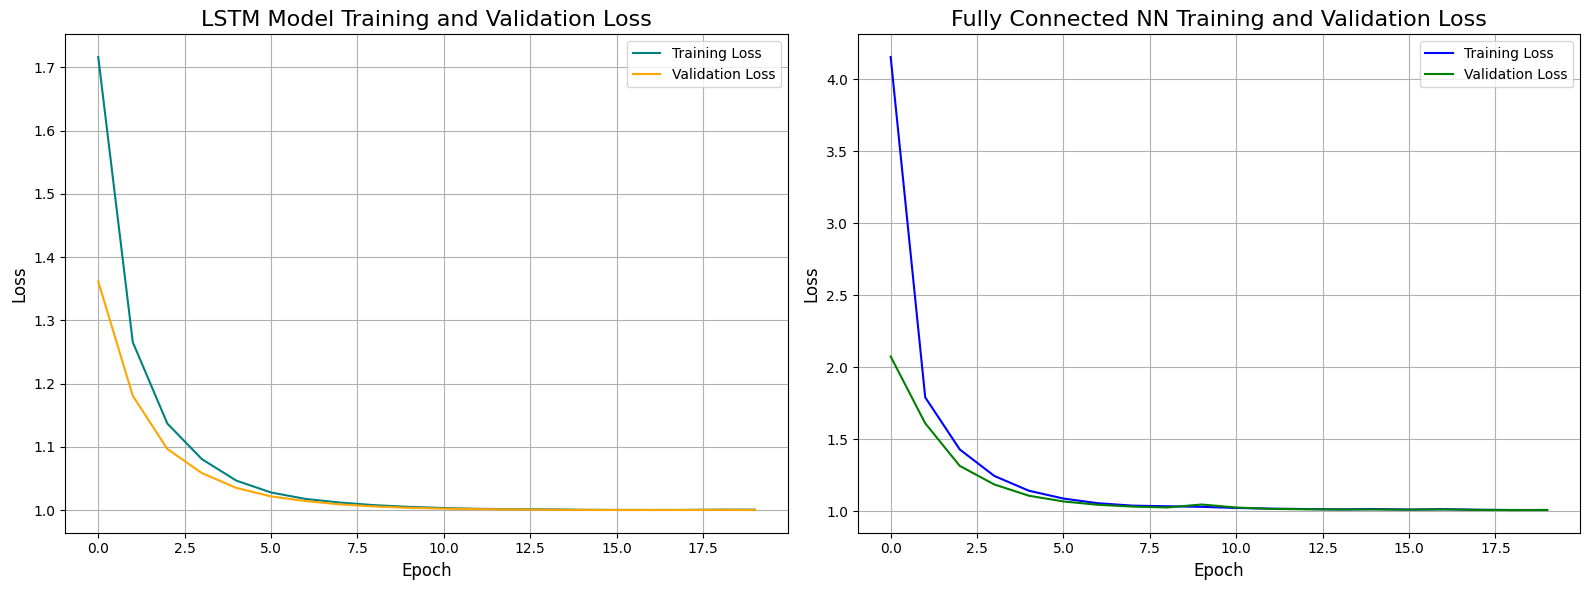

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot training and validation loss for LSTM model
ax1.plot(history_lstm.history["loss"], color="teal", label="Training Loss")
ax1.plot(history_lstm.history["val_loss"], color="orange", label="Validation Loss")
ax1.set_title("LSTM Model Training and Validation Loss", fontsize=16)
ax1.set_xlabel("Epoch", fontsize=12)
ax1.set_ylabel("Loss", fontsize=12)
ax1.legend(loc="upper right")
ax1.grid(True)

# Plot training and validation loss for Fully Connected NN model
ax2.plot(history.history["loss"], color="blue", label="Training Loss")
ax2.plot(history.history["val_loss"], color="green", label="Validation Loss")
ax2.set_title("Fully Connected NN Training and Validation Loss", fontsize=16)
ax2.set_xlabel("Epoch", fontsize=12)
ax2.set_ylabel("Loss", fontsize=12)
ax2.legend(loc="upper right")
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


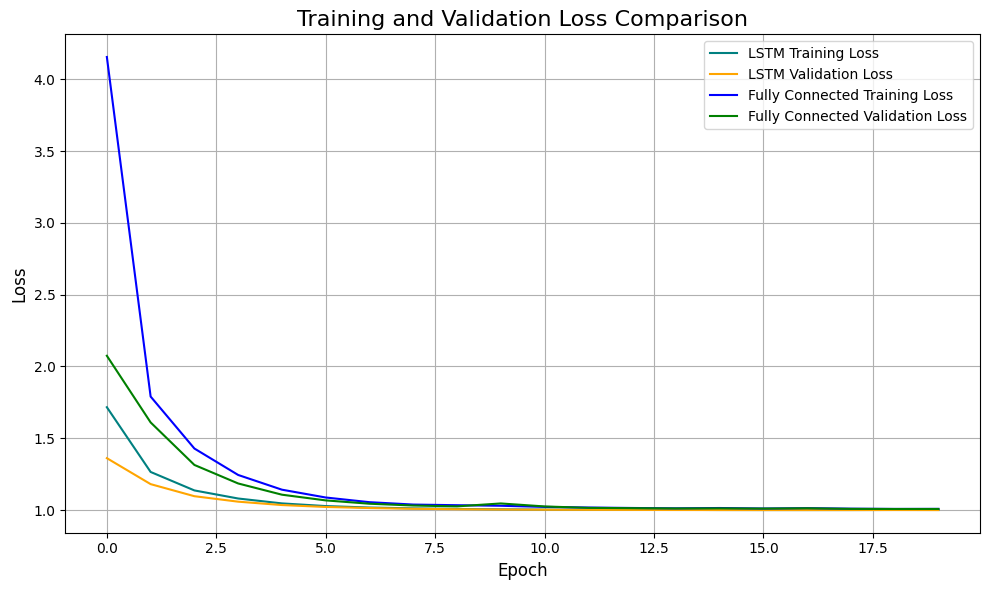

In [ ]:

fig, ax = plt.subplots(figsize=(10, 6))

# Plot training and validation loss for LSTM model
ax.plot(history_lstm.history["loss"], color="teal", label="LSTM Training Loss")
ax.plot(history_lstm.history["val_loss"], color="orange", label="LSTM Validation Loss")

# Plot training and validation loss for Fully Connected NN model
ax.plot(history.history["loss"], color="blue", label="Fully Connected Training Loss")
ax.plot(history.history["val_loss"], color="green", label="Fully Connected Validation Loss")

# Set titles and labels
ax.set_title("Training and Validation Loss Comparison", fontsize=16)
ax.set_xlabel("Epoch", fontsize=12)
ax.set_ylabel("Loss", fontsize=12)

# Add a legend
ax.legend(loc="upper right")

# Improve layout
ax.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


As we can see, the LSTM outperforms the fully connected NN significantly.

## Evaluation and Testing

In [ ]:
X_test

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f419,f420,f469,f472,f534,f537,f626,f627,f695,f698
0,51190.0,0.109427,-0.122111,0.044772,0.594623,0.543421,75932.0,-1.084579,0.001900,0.648230,...,-0.085191,-0.055173,-0.103321,-0.069460,-0.109777,-0.073925,0.251518,0.055656,0.534857,0.473174
1,98479.0,-0.891433,0.451180,0.469801,-1.156122,-0.644384,81224.0,-0.825379,-0.272242,-0.829937,...,-0.085084,-0.055171,-0.103320,-0.069460,-0.109826,-0.073927,-0.412007,-0.338166,-0.484320,-0.475731
2,12982.0,-0.624537,0.451180,0.814647,0.244474,-0.644384,76831.0,0.415328,-0.148479,-0.715683,...,-0.084489,-0.055150,-0.102804,-0.069440,-0.109890,-0.073928,-0.167204,-0.214712,-0.074749,-0.069509
3,79013.0,1.777528,-0.122111,0.804746,1.434981,-0.644384,85218.0,-1.028899,1.338010,1.504424,...,-0.085213,-0.055173,-0.103321,-0.069460,0.674428,0.208560,0.074249,0.004799,0.092917,0.120067
4,27578.0,-0.290917,1.024472,0.779066,-1.086092,0.543421,9836.0,-0.370722,-0.627562,-0.452898,...,-0.082987,-0.055100,-0.103301,-0.069459,-0.109908,-0.073929,-0.392843,-0.334655,-0.387124,-0.379430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,57589.0,-1.491949,1.024472,0.239239,-0.665913,1.533258,75610.0,-1.083427,-0.558805,-1.244110,...,-0.082919,-0.055109,-0.103321,-0.069460,-0.109927,-0.073929,-0.353742,-0.323722,-0.260991,-0.271083
1996,27862.0,-0.624537,-2.415276,0.369219,-1.016063,0.543421,78223.0,-0.568098,-0.938079,-0.748531,...,-0.074181,-0.054559,-0.103317,-0.069460,-0.109927,-0.073929,-0.387584,-0.333844,-0.360586,-0.359032
1997,71812.0,-1.024881,-0.695402,0.436560,-0.385794,0.543421,627.0,0.594273,1.678248,-0.874925,...,-0.085217,-0.055173,-0.017196,-0.053666,0.196366,-0.000905,-0.418642,-0.338636,-0.540500,-0.533255
1998,82175.0,1.377184,-0.122111,0.807077,1.364951,-0.644384,11723.0,0.142688,-0.590300,1.242353,...,-0.065560,-0.053848,-0.102425,-0.069420,-0.109920,-0.073929,2.262138,1.730655,2.716475,2.800498


In [ ]:
standardize_test_prediction_df

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f419,f420,f469,f472,f534,f537,f626,f627,f695,f698
0,149013.0,-0.244805,-2.560499,0.162228,-0.442438,-0.917853,78224.0,-0.249105,-0.893896,-1.479000,...,-0.051676,-0.048350,-0.117679,-0.070890,-0.120747,-0.084386,0.183383,-0.130972,-0.301730,-0.491189
1,231648.0,-0.855969,0.440203,0.855244,-1.138424,1.443067,84938.0,-0.673947,1.673809,-0.843405,...,25.537481,29.466220,-0.117693,-0.080879,-0.118006,-0.084228,-0.185884,-0.242041,0.452518,0.439939
2,147791.0,-0.652248,1.040343,0.659530,-0.233642,-0.736244,85793.0,-1.109470,0.449906,1.298864,...,-0.051670,-0.048350,-0.117659,-0.080879,-0.116243,-0.084315,1.808488,-0.279187,-0.454683,-0.437196
3,230293.0,-0.516434,-0.159937,0.332667,-0.303241,-0.191416,76831.0,-0.096255,-0.016687,-1.123267,...,-0.051681,-0.048350,-0.116975,-0.080873,-0.120760,-0.082519,-0.262322,5.783634,-0.533593,0.364835
4,253635.0,1.520780,0.440203,0.242313,1.227928,-0.191416,10590.0,0.722727,0.379845,1.235877,...,-0.051683,-0.048350,-0.105121,-0.079405,-0.117793,-0.084155,0.309808,0.323124,0.312999,0.310230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,211830.0,-1.059691,1.040343,0.475798,-0.024847,-0.336704,87349.0,-0.023501,-0.924954,-1.218463,...,-0.051683,-0.048350,-0.117556,-0.080875,-0.120762,-0.084386,-0.378967,-0.280550,-0.536578,-0.499856
1996,256283.0,-0.448527,-1.360218,0.522298,-0.512037,-0.736244,1131.0,1.575749,1.851851,-0.603626,...,-0.050911,-0.048288,-0.094378,-0.077924,-0.080760,-0.078595,-0.118587,-0.179974,0.158596,0.151808
1997,188571.0,0.162638,1.040343,0.944720,-0.094445,-0.736244,9290.0,-0.392276,-0.525894,-0.073248,...,-0.051672,-0.048350,-0.116439,-0.080760,-0.120752,-0.084386,-0.310821,-0.262048,-0.273921,-0.280216
1998,242195.0,1.588687,1.040343,0.748132,-0.372840,-0.917853,76831.0,-1.020363,3.345888,1.968099,...,-0.051683,-0.048350,-0.117531,-0.080692,-0.120732,-0.083819,-0.357778,-0.258676,-0.096760,-0.487598


In [ ]:
X_test = standardize_test_df.drop(columns = "loss")
y_test = standardize_test_df["loss"]
test_pred = standardize_test_prediction_df

In [ ]:
# For the fully connected NN model
fcnn_eval = model1.evaluate(X_test_reshaped1, y_test)

# For the LSTM model
lstm_eval = model_lstm.evaluate(X_test_reshaped, y_test_reshaped)


print("Fully Connected NN - Loss:", fcnn_eval[0])
print("Fully Connected NN - MAE:", fcnn_eval[1])

print("LSTM - Loss:", lstm_eval[0])
print("LSTM - MAE:", lstm_eval[1])


7/7 [==============================] - 0s 18ms/step - loss: 1.0002 - mae: 0.3984
Fully Connected NN - Loss: 1.0075390338897705
Fully Connected NN - MAE: 0.3912925720214844
LSTM - Loss: 1.0002171993255615
LSTM - MAE: 0.3984045088291168


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

test_pred_fcnn_data = test_pred.values.reshape(test_pred.shape[0], num_features, 1)
test_pred_lstm_data = test_pred.values.reshape(-1, time_steps, num_features)

test_pred_fcnn = model.predict(test_pred_fcnn_data)
test_pred_lstm = model_lstm.predict(test_pred_lstm_data)

# Reshape the test_pred_lstm to match the reshaped y_test
test_pred_lstm_reshaped = test_pred_lstm.reshape(-1, time_steps, 1)

# Calculate loss for the generated predictions
loss_fcnn = mean_squared_error(y_test, test_pred_fcnn)
mae_fcnn = mean_absolute_error(y_test, test_pred_fcnn)

loss_lstm = mean_squared_error(y_test_reshaped, test_pred_lstm_reshaped)
mae_lstm = mean_absolute_error(y_test_reshaped, test_pred_lstm_reshaped)

# Display the evaluation metrics
print("Fully Connected NN - Loss:", loss_fcnn)
print("Fully Connected NN - MAE:", mae_fcnn)

print("LSTM - Loss:", loss_lstm)
print("LSTM - MAE:", mae_lstm)


7/7 [==============================] - 0s 12ms/step


ValueError: ignored

In [ ]:
# Get the mean and std of the original y_train
original_mean = train_data.loss.mean()
original_std = train_data.loss.std()

# Reverse standardization for FCNN predictions
test_pred_fcnn_original = (test_pred_fcnn * original_std) + original_mean

# Reverse standardization for LSTM predictions
test_pred_lstm_original = (test_pred_lstm * original_std) + original_mean


In [ ]:
test_pred_fcnn_original

array([[0.81304854],
       [0.81304854],
       [0.81304854],
       ...,
       [0.81304854],
       [0.81304854],
       [0.81304854]], dtype=float32)

In [ ]:
fcnn_predictions_df

,fcnn_prediction
0,0.813049
1,0.813049
2,0.813049
3,0.813049
4,0.813049
...,...
1995,0.813049
1996,0.813049
1997,0.813049
1998,0.813049


In [ ]:
# Create dataframes for the predictions
fcnn_predictions_df = pd.DataFrame(test_pred_fcnn_original, columns=["fcnn_prediction"])
lstm_predictions_df = pd.DataFrame(test_pred_lstm_original, columns=["lstm_prediction"])

# Concatenate the dataframes horizontally
combined_predictions_df = pd.concat([fcnn_predictions_df, lstm_predictions_df], axis=1)
combined_predictions_df

,fcnn_prediction,lstm_prediction
0,0.813049,0.833058
1,0.813049,0.833058
2,0.813049,0.833058
3,0.813049,0.833058
4,0.813049,0.833058
...,...,...
1995,0.813049,NaN
1996,0.813049,NaN
1997,0.813049,NaN
1998,0.813049,NaN


In [ ]:
fcnn_predictions_df.value_counts()

fcnn_prediction
0.813049           2000
dtype: int64

## Saving the Models

In [ ]:
from tensorflow.keras.models import load_model

model_lstm.save("/content/drive/MyDrive/Loan_data/lstmbankloan.h5")
model1.save("/content/drive/MyDrive/Loan_data/nnbankloan.h5")